In [51]:
import torch
import numpy as np

In [52]:
from torchvision import datasets, transforms

In [53]:
batch_size= 50

In [54]:
transform= transforms.ToTensor()

In [55]:
train_data= datasets.MNIST(root='data', transform= transform, train= True, download= True)

In [56]:
test_data= datasets.MNIST(root='data', transform= transform, train= False, download= True)

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
trainloader= torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True)
testloader= torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=True)

In [9]:
images, labels= next(iter(trainloader))
images=images.numpy()

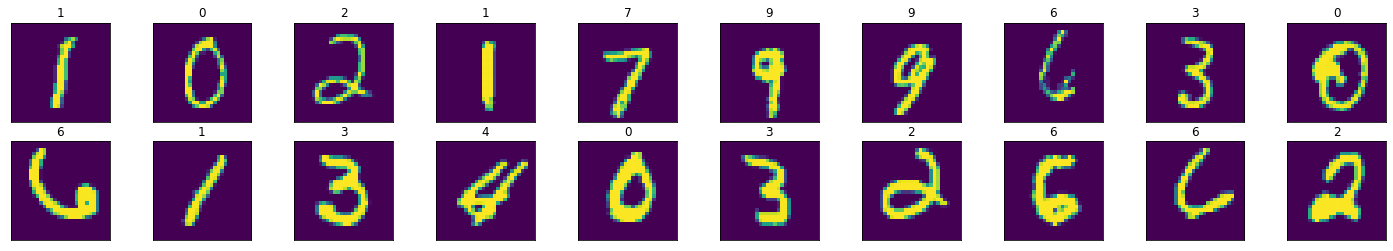

In [59]:
fig= plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax=fig.add_subplot(2,20/2,idx+1,xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    ax.set_title(str(labels[idx].item()))

In [41]:
import torch.nn as nn
import torch.nn.functional as F




class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        
        self.fc1= nn.Linear(784,512)

        self.fc2= nn.Linear(512,256)

        self.fc3= nn.Linear(256,64)

        self.fc4= nn.Linear(64,10)
        self.dropout = nn.Dropout(0.2)
        
        
    def forward(self,x):
        x=x.view(-1,784)
        x=nn.functional.relu(self.fc1(x))
        x = self.dropout(x)

        x=nn.functional.relu(self.fc2(x))
        x = self.dropout(x)

        x=nn.functional.relu(self.fc3(x))
        x = self.dropout(x)

        x=self.fc4(x)
        
        return x

In [43]:
model= Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [45]:
epochs= 50
model.train()


for epoch in range(epochs):
    train_loss=0.0
    
    
    for data, targets  in trainloader:
        optimizer.zero_grad()
        output=model(data)
        loss=criterion(output,targets)
        loss.backward()
        optimizer.step()
    
    
        train_loss+= loss.item() * data.size(0)
    
    train_loss= train_loss/len(trainloader.sampler)

    
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 2.096897
Epoch: 2 	Training Loss: 0.840293
Epoch: 3 	Training Loss: 0.514318
Epoch: 4 	Training Loss: 0.417991
Epoch: 5 	Training Loss: 0.357070
Epoch: 6 	Training Loss: 0.311578
Epoch: 7 	Training Loss: 0.274279
Epoch: 8 	Training Loss: 0.241393
Epoch: 9 	Training Loss: 0.218411
Epoch: 10 	Training Loss: 0.198272
Epoch: 11 	Training Loss: 0.178246
Epoch: 12 	Training Loss: 0.166059
Epoch: 13 	Training Loss: 0.150777
Epoch: 14 	Training Loss: 0.140704
Epoch: 15 	Training Loss: 0.135173
Epoch: 16 	Training Loss: 0.123883
Epoch: 17 	Training Loss: 0.116847
Epoch: 18 	Training Loss: 0.109451
Epoch: 19 	Training Loss: 0.105691
Epoch: 20 	Training Loss: 0.100630
Epoch: 21 	Training Loss: 0.094289
Epoch: 22 	Training Loss: 0.089364
Epoch: 23 	Training Loss: 0.085393
Epoch: 24 	Training Loss: 0.080798
Epoch: 25 	Training Loss: 0.077539
Epoch: 26 	Training Loss: 0.074325
Epoch: 27 	Training Loss: 0.072156
Epoch: 28 	Training Loss: 0.069853
Epoch: 29 	Training Loss: 0.0

In [47]:
test_loss=0.0
class_correct=list(0. for i in range(10))
class_total= list(0. for i in range(10))


model.eval()


for data, target in testloader:
    output=model(data)
    loss=criterion(output,target)
    test_loss= loss.item() * data.size(0)
    
    _,pred= torch.max(output,1)
    correct=np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(len(target)):
        label=target.data[i]
        
        class_correct[label]+=correct[i].item()
        class_total[label]+=1
        
test_loss = test_loss/len(testloader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.000172

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1124/1135)
Test Accuracy of     2: 97% (1011/1032)
Test Accuracy of     3: 98% (996/1010)
Test Accuracy of     4: 97% (962/982)
Test Accuracy of     5: 98% (880/892)
Test Accuracy of     6: 97% (938/958)
Test Accuracy of     7: 97% (998/1028)
Test Accuracy of     8: 97% (950/974)
Test Accuracy of     9: 98% (990/1009)

Test Accuracy (Overall): 98% (9820/10000)


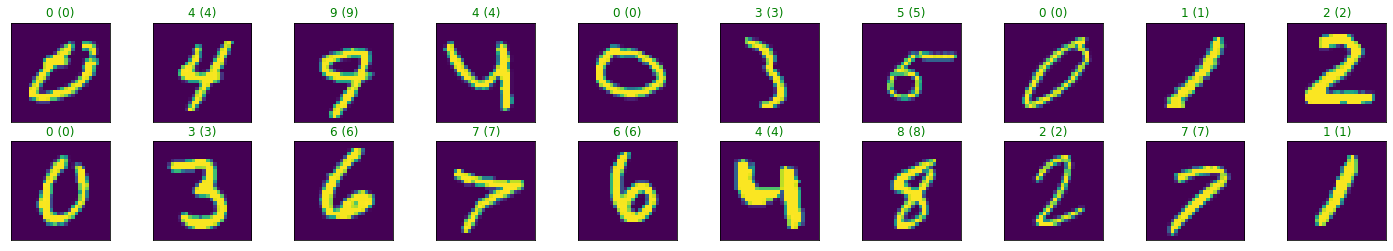

In [66]:
images,labels= next(iter(testloader))
output=model(images)
_,preds=torch.max(output,1)
images= images.numpy()


fig=plt.figure(figsize=[25,4])
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    ax.set_title("{} ({})".format(str(preds[idx].item()),str(labels[idx].item())),
                color=("green" if preds[idx]==labels[idx] else "red"))